# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>


Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the [PACE Strategy Document ](https://docs.google.com/document/d/1iSHdbfQR6w8RClJNWai8oJXn9tQmYoTKn6QohuaK4-s/template/preview?resourcekey=0-ZIHnbxL1dd2u9A47iEVXvg).

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.



### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Read in the data and store it as a dataframe object called df.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:
1. Does the data need to be restructured or converted into usable formats?

2. Are there any variables that have missing data?


The data is already organized with each row corresponding to a user. A significant number of rows (700) have missing 'label' information, but no other variables contain missing values. 

### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?







Given the scenario, which data columns are most applicable?

label (churn status), usage frequency, total distance driven, number of reports, average session length, last active date.

Which data columns can you eliminate, knowing they won’t solve your problem scenario?

Likely ID (unless it encodes sign-up time), and potentially demographic information like name or precise address if not directly relevant to app usage.

How would you check for missing data? And how would you handle missing data (if any)?

Check with df.isnull().sum() and df.info(). Handle by removing rows with missing label, and potentially imputing or removing rows/columns with missing behavioral data depending on the extent and nature of missingness.

How would you check for outliers? And how would handle outliers (if any)?

Check with box plots and scatter plots. Handle by removing if errors, transforming if skewing data, or capping if extreme but valid values.

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [4]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [5]:
df.size

194987

Generate summary statistics using the `describe()` method.

In [6]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?

Identify: Use box plots, scatter plots, Z-scores, and IQR rule.

Decide:

Remove errors.
Transform or cap extreme but valid values.
Consider model sensitivity and analysis goals.
Document all actions.

### **Task 3a. Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

**Question:** What type of data visualization(s) will be most helpful?

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map



For understanding and explaining the Waze user churn data, the most helpful data visualizations would be:

Bar charts: To compare churn rates across different categories (e.g., device type, activity levels).

Histograms: To visualize the distribution of numerical features (e.g., usage frequency, distance driven) and identify potential skewness or unusual patterns.

Box plots: To compare the distribution of numerical features between churned and retained users and to identify outliers.

Scatter plots: To explore relationships between two numerical variables and see if there are any correlations related to churn.

Heat map: To visualize correlations between different features in the dataset.


Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

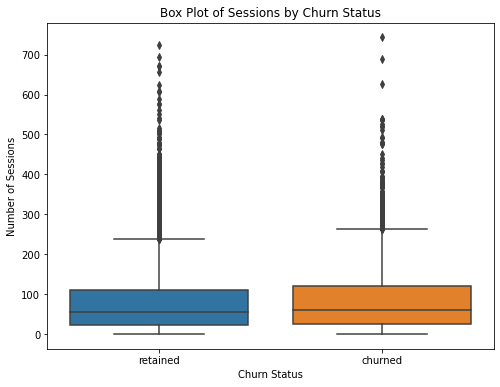

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'label' is the churn status column
# and you want to see the distribution of 'sessions' by churn status

plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='sessions', data=df)
plt.title('Box Plot of Sessions by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Sessions')
plt.show()

# You can create similar box plots for other relevant numerical features
# like 'drives', 'total_sessions', 'driven_km_drives', etc.


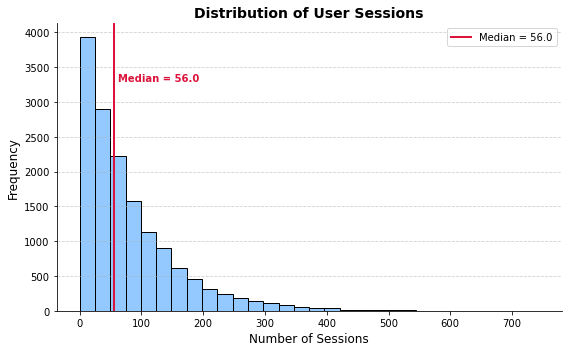

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's make it a bit more visually appealing and informative!
plt.figure(figsize=(8, 5))  # Slightly wider for better readability
sns.histplot(x=df['sessions'], bins=30, color='#66b3ff', edgecolor='black', alpha=0.7) # Nicer color, edge, transparency

median_sessions = df['sessions'].median()
plt.axvline(median_sessions, color='crimson', linestyle='-', linewidth=2, label=f'Median = {median_sessions:.1f}') # Solid red line, thicker, with label

# Position the text more dynamically and with better style
plt.text(median_sessions * 1.1, plt.ylim()[1] * 0.8, f'Median = {median_sessions:.1f}', color='crimson', fontsize=10, fontweight='bold')

plt.title('Distribution of User Sessions', fontsize=14, fontweight='bold') # More descriptive and styled title
plt.xlabel('Number of Sessions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6) # Add a subtle grid for easier reading
plt.legend() # Show the label for the median line
sns.despine() # Remove top and right spines for a cleaner look
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

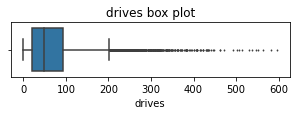

In [14]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives box plot');

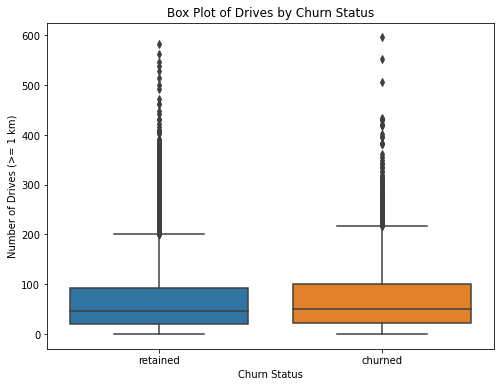

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'drives' by 'label'
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='drives', data=df)
plt.title('Box Plot of Drives by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Drives (>= 1 km)')
plt.show()

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

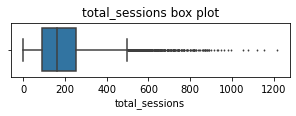

In [17]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');


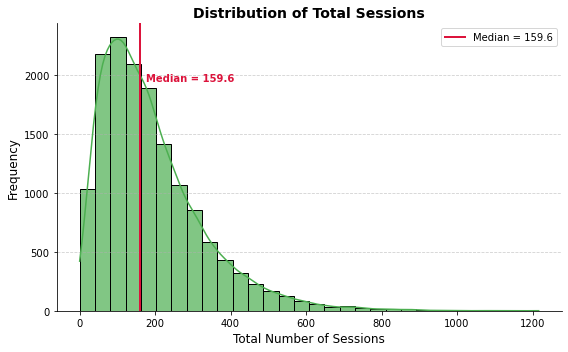

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and you want to visualize the distribution of 'total_sessions'

plt.figure(figsize=(8, 5))
sns.histplot(df['total_sessions'], bins=30, color='#4CAF50', edgecolor='black', alpha=0.7, kde=True) # Green color scheme
median_total_sessions = df['total_sessions'].median()
plt.axvline(median_total_sessions, color='crimson', linestyle='-', linewidth=2, label=f'Median = {median_total_sessions:.1f}')
plt.text(median_total_sessions * 1.1, plt.ylim()[1] * 0.8, f'Median = {median_total_sessions:.1f}', color='crimson', fontsize=10, fontweight='bold')
plt.title('Distribution of Total Sessions', fontsize=14, fontweight='bold')
plt.xlabel('Total Number of Sessions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

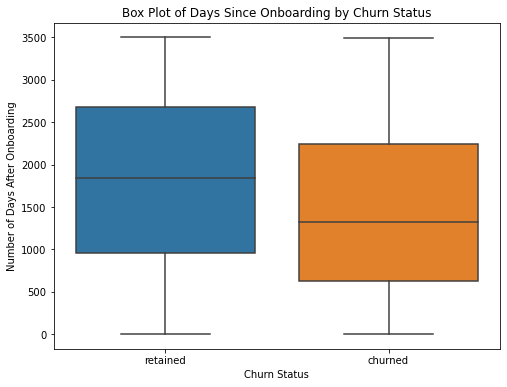

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'n_days_after_onboarding' by 'label'
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='n_days_after_onboarding', data=df)
plt.title('Box Plot of Days Since Onboarding by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Days After Onboarding')
plt.show()

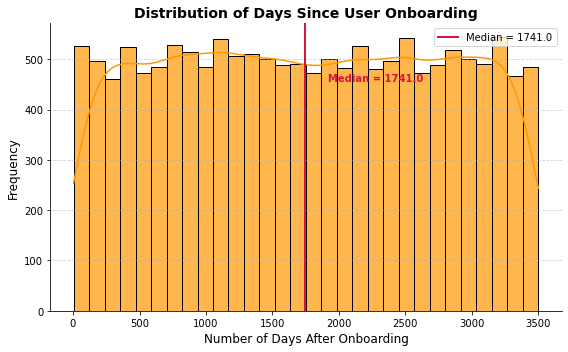

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for the distribution of 'n_days_after_onboarding'
plt.figure(figsize=(8, 5))
sns.histplot(df['n_days_after_onboarding'], bins=30, color='#ff9800', edgecolor='black', alpha=0.7, kde=True) # Orange color scheme
median_onboarding_days = df['n_days_after_onboarding'].median()
plt.axvline(median_onboarding_days, color='crimson', linestyle='-', linewidth=2, label=f'Median = {median_onboarding_days:.1f}')
plt.text(median_onboarding_days * 1.1, plt.ylim()[1] * 0.8, f'Median = {median_onboarding_days:.1f}', color='crimson', fontsize=10, fontweight='bold')
plt.title('Distribution of Days Since User Onboarding', fontsize=14, fontweight='bold')
plt.xlabel('Number of Days After Onboarding', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

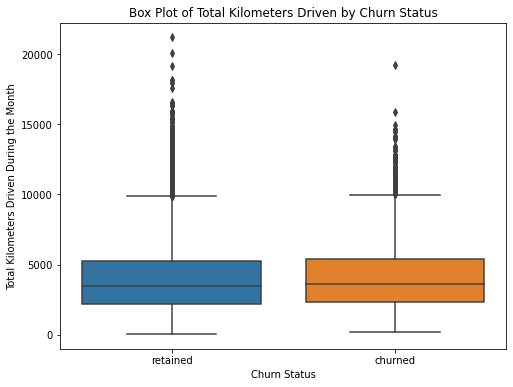

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'driven_km_drives' by 'label'
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='driven_km_drives', data=df)
plt.title('Box Plot of Total Kilometers Driven by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Kilometers Driven During the Month')
plt.show()

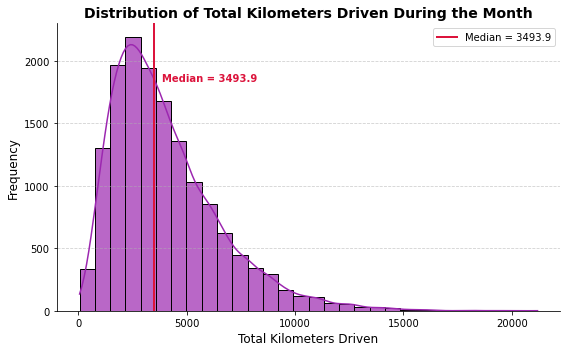

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for the distribution of 'driven_km_drives'
plt.figure(figsize=(8, 5))
sns.histplot(df['driven_km_drives'], bins=30, color='#9c27b0', edgecolor='black', alpha=0.7, kde=True) # Purple color scheme
median_km_driven = df['driven_km_drives'].median()
plt.axvline(median_km_driven, color='crimson', linestyle='-', linewidth=2, label=f'Median = {median_km_driven:.1f}')
plt.text(median_km_driven * 1.1, plt.ylim()[1] * 0.8, f'Median = {median_km_driven:.1f}', color='crimson', fontsize=10, fontweight='bold')
plt.title('Distribution of Total Kilometers Driven During the Month', fontsize=14, fontweight='bold')
plt.xlabel('Total Kilometers Driven', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

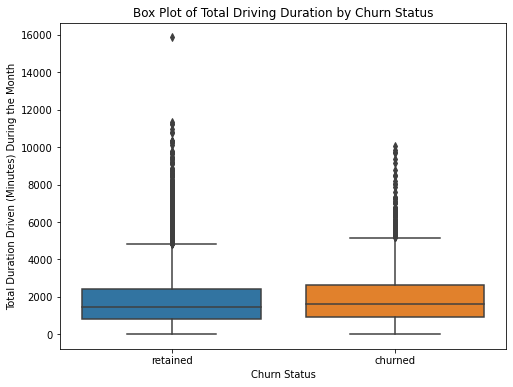

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'duration_minutes_drives' by 'label'
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='duration_minutes_drives', data=df)
plt.title('Box Plot of Total Driving Duration by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Duration Driven (Minutes) During the Month')
plt.show()

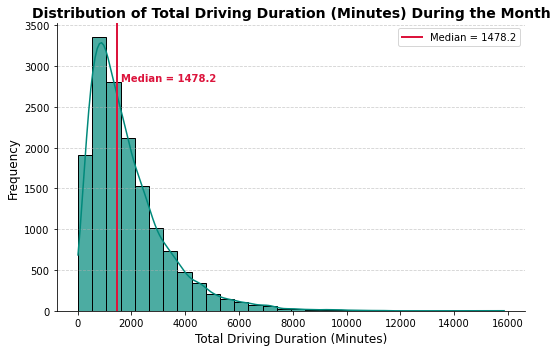

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for the distribution of 'duration_minutes_drives'
plt.figure(figsize=(8, 5))
sns.histplot(df['duration_minutes_drives'], bins=30, color='#00897b', edgecolor='black', alpha=0.7, kde=True) # Teal color scheme
median_duration = df['duration_minutes_drives'].median()
plt.axvline(median_duration, color='crimson', linestyle='-', linewidth=2, label=f'Median = {median_duration:.1f}')
plt.text(median_duration * 1.1, plt.ylim()[1] * 0.8, f'Median = {median_duration:.1f}', color='crimson', fontsize=10, fontweight='bold')
plt.title('Distribution of Total Driving Duration (Minutes) During the Month', fontsize=14, fontweight='bold')
plt.xlabel('Total Driving Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

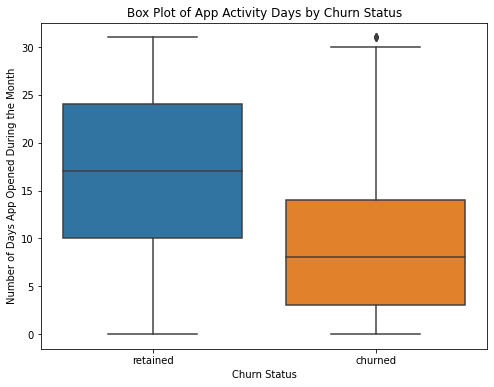

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'activity_days' by 'label'
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='activity_days', data=df)
plt.title('Box Plot of App Activity Days by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Days App Opened During the Month')
plt.show()

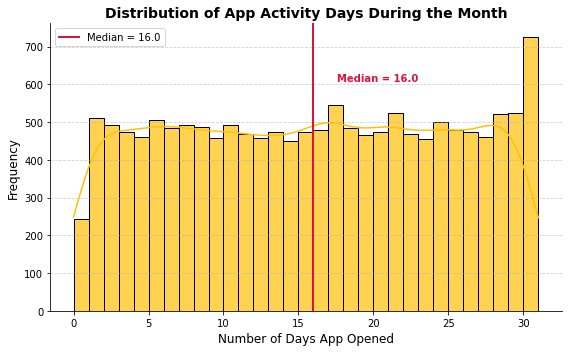

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for the distribution of 'activity_days'
plt.figure(figsize=(8, 5))
sns.histplot(df['activity_days'], bins=31, color='#ffc107', edgecolor='black', alpha=0.7, kde=True) # Amber/Yellow color scheme
median_activity_days = df['activity_days'].median()
plt.axvline(median_activity_days, color='crimson', linestyle='-', linewidth=2, label=f'Median = {median_activity_days:.1f}')
plt.text(median_activity_days * 1.1, plt.ylim()[1] * 0.8, f'Median = {median_activity_days:.1f}', color='crimson', fontsize=10, fontweight='bold')
plt.title('Distribution of App Activity Days During the Month', fontsize=14, fontweight='bold')
plt.xlabel('Number of Days App Opened', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

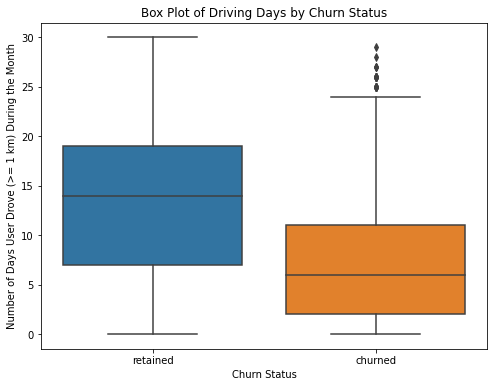

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'driving_days' by 'label'
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='driving_days', data=df)
plt.title('Box Plot of Driving Days by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Days User Drove (>= 1 km) During the Month')
plt.show()

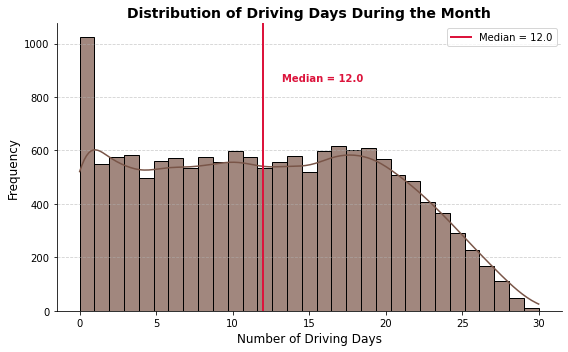

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for the distribution of 'driving_days'
plt.figure(figsize=(8, 5))
sns.histplot(df['driving_days'], bins=31, color='#795548', edgecolor='black', alpha=0.7, kde=True) # Brown color scheme
median_driving_days = df['driving_days'].median()
plt.axvline(median_driving_days, color='crimson', linestyle='-', linewidth=2, label=f'Median = {median_driving_days:.1f}')
plt.text(median_driving_days * 1.1, plt.ylim()[1] * 0.8, f'Median = {median_driving_days:.1f}', color='crimson', fontsize=10, fontweight='bold')
plt.title('Distribution of Driving Days During the Month', fontsize=14, fontweight='bold')
plt.xlabel('Number of Driving Days', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

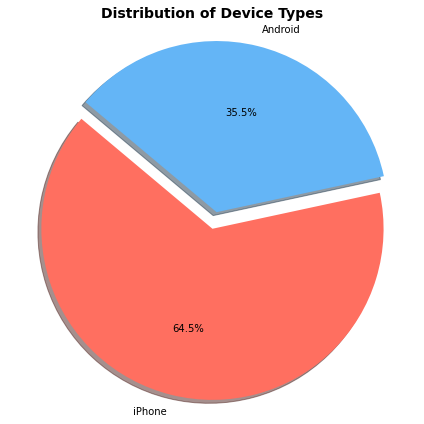

In [29]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'device' is the column containing device types

device_counts = df['device'].value_counts()
labels = device_counts.index
sizes = device_counts.values
colors = ['#ff6f60', '#64b5f6']  # Distinct colors for the slices
explode = (0.1, 0)  # Slightly offset the first slice (e.g., 'iPhone')

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Device Types', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

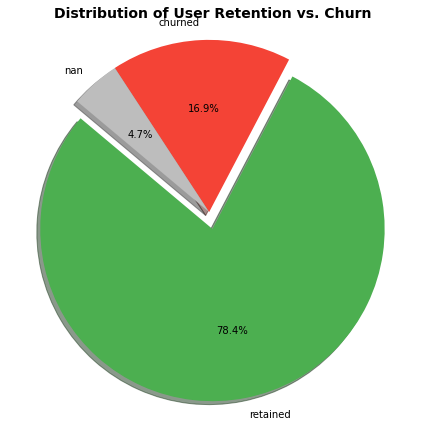

In [30]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'label' is the churn status column

label_counts = df['label'].value_counts(dropna=False) # Include NaN values for completeness
labels = label_counts.index
sizes = label_counts.values
colors = ['#4CAF50', '#f44336', '#bdbdbd']  # Green for retained, red for churned, grey for missing
explode = (0.1, 0, 0) if 'churned' in labels and 'retained' in labels and label_counts.get(float('nan'), 0) > 0 else \
          (0.1, 0) if 'churned' in labels and 'retained' in labels else \
          (0.1,) if 'retained' in labels or 'churned' in labels else \
          (0,) # Explode 'churned' if present

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of User Retention vs. Churn', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

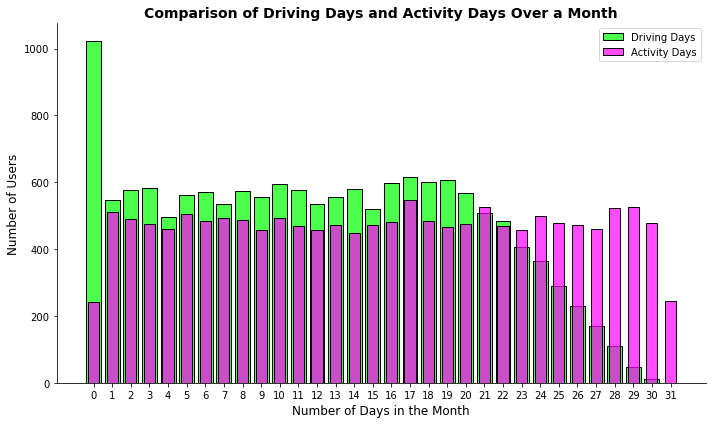

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'df' is your DataFrame containing 'driving_days' and 'activity_days'

plt.figure(figsize=(10, 6))

# Create bins for each day of the month (0 to 32)
bins = np.arange(0, 32)

# Plot histogram for driving_days with a bright color
sns.histplot(df['driving_days'], bins=bins, color='#00ff00', alpha=0.7, label='Driving Days', discrete=True, shrink=0.8) # Bright Green

# Plot histogram for activity_days with another bright color
sns.histplot(df['activity_days'], bins=bins, color='#ff00ff', alpha=0.7, label='Activity Days', discrete=True, shrink=0.6) # Bright Magenta

plt.title('Comparison of Driving Days and Activity Days Over a Month', fontsize=14, fontweight='bold')
plt.xlabel('Number of Days in the Month', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(range(0, 32))
plt.legend(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [35]:
# Confirm the maximum number of days for 'driving_days' and 'activity_days'
max_driving_days = df['driving_days'].max()
max_activity_days = df['activity_days'].max()

print(f"Maximum number of driving days in the month: {max_driving_days}")
print(f"Maximum number of activity days in the month: {max_activity_days}")

Maximum number of driving days in the month: 30
Maximum number of activity days in the month: 31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

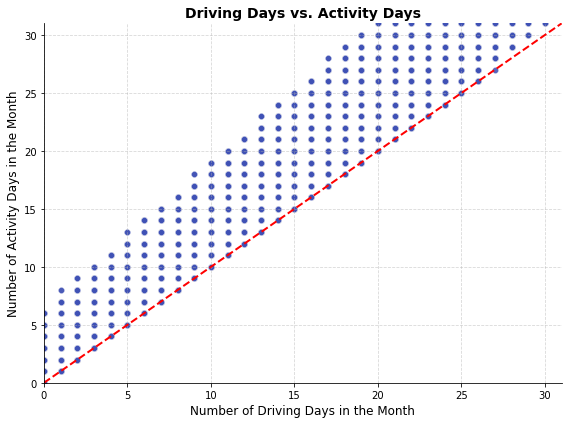

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of driving_days vs. activity_days

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='driving_days', y='activity_days', alpha=0.5, color='#3f51b5') # Indigo-ish color
plt.title('Driving Days vs. Activity Days', fontsize=14, fontweight='bold')
plt.xlabel('Number of Driving Days in the Month', fontsize=12)
plt.ylabel('Number of Activity Days in the Month', fontsize=12)
plt.xlim(0, 31)  # Set x-axis limit to 0-31 for clarity
plt.ylim(0, 31)  # Set y-axis limit to 0-31 for consistency
plt.grid(True, linestyle='--', alpha=0.5)

# Add a red dashed line representing y=x
plt.plot([0, 31], [0, 31], color='red', linestyle='--', linewidth=2)

sns.despine()
plt.tight_layout()
plt.show()

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

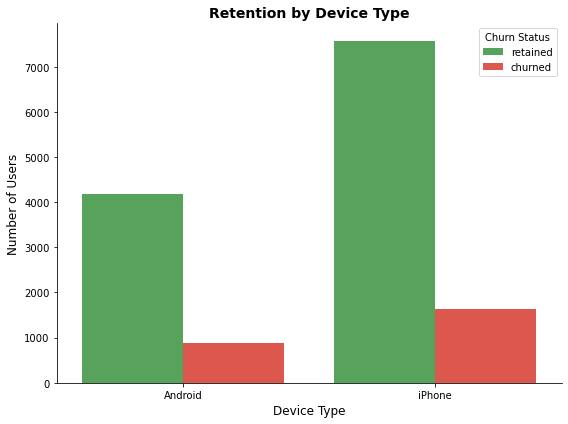

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'device' and 'label' columns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='device', hue='label', palette={'retained': '#4CAF50', 'churned': '#f44336'})
plt.title('Retention by Device Type', fontsize=14, fontweight='bold')
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend(title='Churn Status')
sns.despine()
plt.tight_layout()
plt.show()

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven per driving day last month for users who churned was 697.54 km, versus 289.55 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

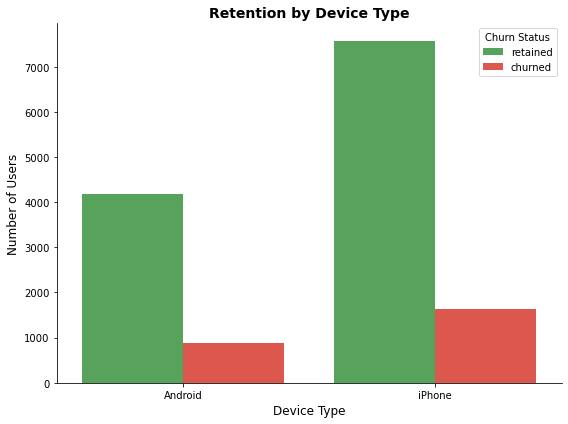

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'device' and 'label' columns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='device', hue='label', palette={'retained': '#4CAF50', 'churned': '#f44336'})
plt.title('Retention by Device Type', fontsize=14, fontweight='bold')
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend(title='Churn Status')
sns.despine()
plt.tight_layout()
plt.show()

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

No handles with labels found to put in legend.


count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64


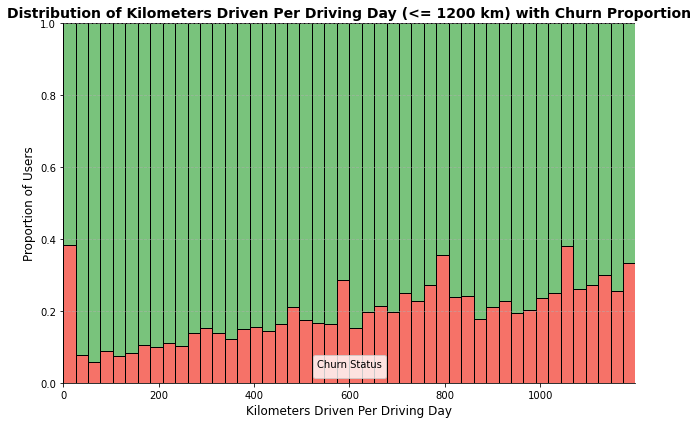

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Create the 'km_per_driving_day' column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 1. Convert infinite values to zero
df['km_per_driving_day'] = df['km_per_driving_day'].replace(np.inf, 0)

# 2. Confirm that it worked
print(df['km_per_driving_day'].describe())

# Filter out rows where km_per_driving_day is greater than 1200
df_filtered = df[df['km_per_driving_day'] <= 1200]

# Histogram of km_per_driving_day, with churn比例 stacked
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='km_per_driving_day', hue='label', multiple='fill', palette={'retained': '#4CAF50', 'churned': '#f44336'}, discrete=False)
plt.title('Distribution of Kilometers Driven Per Driving Day (<= 1200 km) with Churn Proportion', fontsize=14, fontweight='bold')
plt.xlabel('Kilometers Driven Per Driving Day', fontsize=12)
plt.ylabel('Proportion of Users', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Churn Status')
sns.despine()
plt.tight_layout()
plt.show()

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

No handles with labels found to put in legend.


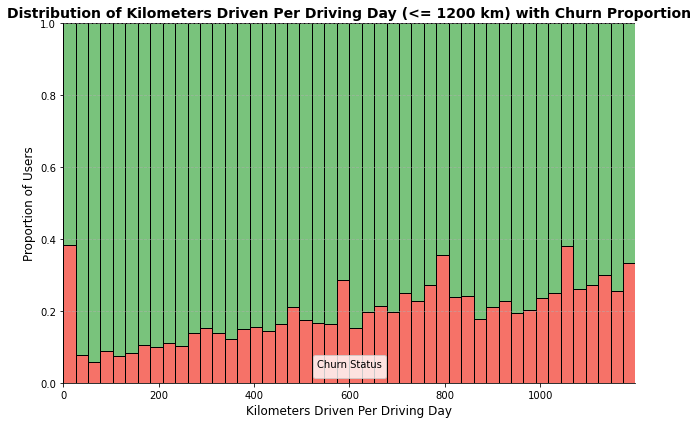

In [43]:
# Filter out rows where km_per_driving_day is greater than 1200
df_filtered = df[df['km_per_driving_day'] <= 1200]

# Histogram of km_per_driving_day, with churn proportion stacked
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='km_per_driving_day', hue='label', multiple='fill', palette={'retained': '#4CAF50', 'churned': '#f44336'}, discrete=False)
plt.title('Distribution of Kilometers Driven Per Driving Day (<= 1200 km) with Churn Proportion', fontsize=14, fontweight='bold')
plt.xlabel('Kilometers Driven Per Driving Day', fontsize=12)
plt.ylabel('Proportion of Users', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Churn Status')
sns.despine()
plt.tight_layout()
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

No handles with labels found to put in legend.


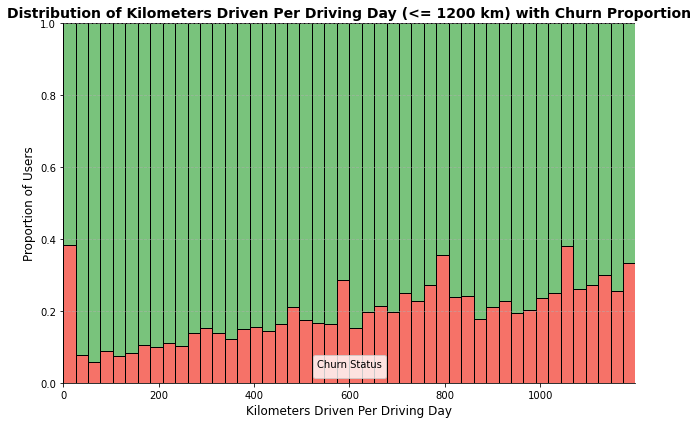

In [44]:
# Filter out rows where km_per_driving_day is greater than 1200
df_filtered = df[df['km_per_driving_day'] <= 1200]

# Histogram of km_per_driving_day, with churn proportion stacked
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='km_per_driving_day', hue='label', multiple='fill', palette={'retained': '#4CAF50', 'churned': '#f44336'}, discrete=False)
plt.title('Distribution of Kilometers Driven Per Driving Day (<= 1200 km) with Churn Proportion', fontsize=14, fontweight='bold')
plt.xlabel('Kilometers Driven Per Driving Day', fontsize=12)
plt.ylabel('Proportion of Users', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Churn Status')
sns.despine()
plt.tight_layout()
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [45]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

What is the median value of the new column?

In [46]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Now, create a histogram depicting the distribution of values in this new column.

No handles with labels found to put in legend.


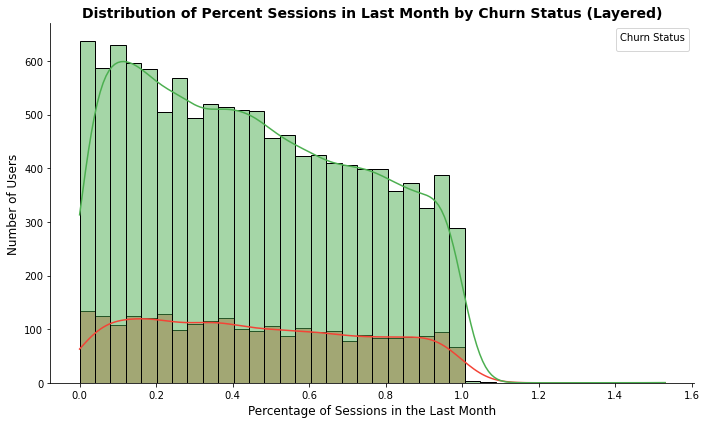

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains 'percent_sessions_in_last_month' and 'label' columns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='percent_sessions_in_last_month', hue='label', multiple='layer',
             palette={'retained': '#4CAF50', 'churned': '#f44336'}, kde=True)
plt.title('Distribution of Percent Sessions in Last Month by Churn Status (Layered)', fontsize=14, fontweight='bold')
plt.xlabel('Percentage of Sessions in the Last Month', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend(title='Churn Status')
sns.despine()
plt.tight_layout()
plt.show()

Check the median value of the `n_days_after_onboarding` variable.

In [50]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

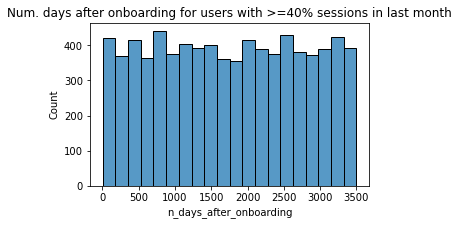

In [52]:
# Histogram
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [53]:
def impute_outliers_with_percentile(series):
    """
    Calculates the 95th percentile of a Series and imputes values greater than
    the 95th percentile with the value at the 95th percentile.

    Args:
        series (pd.Series): The input pandas Series.

    Returns:
        pd.Series: A new Series with outliers imputed.
    """
    percentile_95 = series.quantile(0.95)
    imputed_series = series.apply(lambda x: percentile_95 if x > percentile_95 else x)
    return imputed_series

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [55]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Call `describe()` to see if your change worked.

In [56]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999999


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

**Ask yourself:** Did you consider color, contrast, emphasis, and labeling?



Learned: Churn rate, device distribution, usage patterns (more app opens than drives for many), long median onboarding but recent activity in some, skewed driving behavior, potential device-based retention differences, relationship between daily driving and churn.

Questions: Churn rate proportion by device? Churn for high-activity but low-drive users? Churn of recently active long-term users? Driving thresholds and churn? Feature usage and churn? Churn trends over time?

Next steps: Explore churn rate proportion by device.




Use the following two code blocks (add more blocks if you like) to do additional EDA you feel is important based on the given scenario.

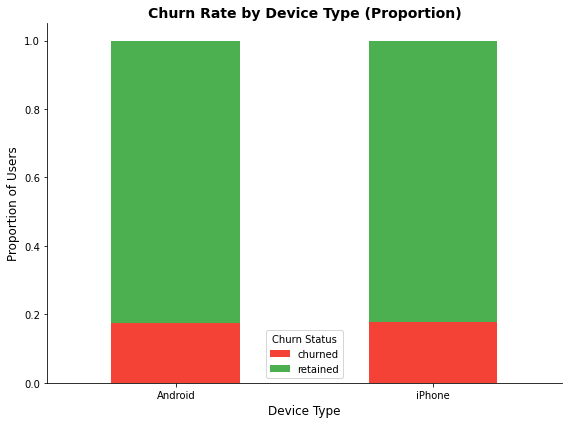


Churn Rate by Device (Proportion):
label     churned  retained
device                     
Android  0.175601  0.824399
iPhone   0.178320  0.821680


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rate by device type (proportion)
device_churn_rate = df.groupby('device')['label'].value_counts(normalize=True).unstack()

# Plotting the churn rate by device
device_churn_rate.plot(kind='bar', stacked=True, figsize=(8, 6), color={'retained': '#4CAF50', 'churned': '#f44336'})
plt.title('Churn Rate by Device Type (Proportion)', fontsize=14, fontweight='bold')
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Proportion of Users', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Churn Status')
sns.despine()
plt.tight_layout()
plt.show()

print("\nChurn Rate by Device (Proportion):")
print(device_churn_rate)

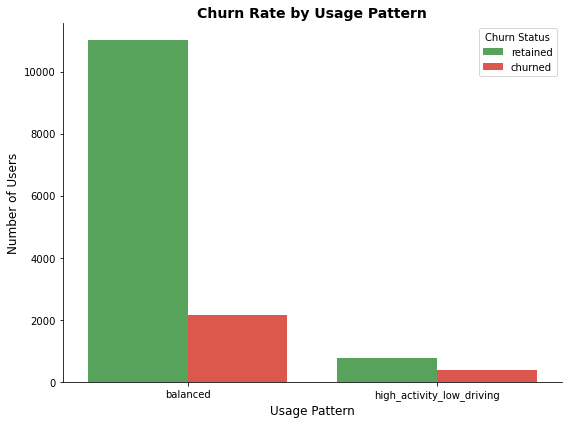


Churn Rate Proportions by Usage Pattern:
label                       churned  retained
usage_pattern                                
balanced                   0.164578  0.835422
high_activity_low_driving  0.325972  0.674028


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the ratio of activity days to driving days
df['activity_to_driving_ratio'] = (df['activity_days'] + 1) / (df['driving_days'] + 1)  # Add 1 to avoid division by zero

# Create a new feature for user segments based on this ratio
df['usage_pattern'] = df['activity_to_driving_ratio'].apply(lambda x: 'high_activity_low_driving' if x > 2 else 'balanced')

# Visualize churn rate by usage pattern
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='usage_pattern', hue='label', palette={'retained': '#4CAF50', 'churned': '#f44336'})
plt.title('Churn Rate by Usage Pattern', fontsize=14, fontweight='bold')
plt.xlabel('Usage Pattern', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend(title='Churn Status')
sns.despine()
plt.tight_layout()
plt.show()

# Print churn rate proportions by usage pattern
usage_pattern_churn_rate = df.groupby('usage_pattern')['label'].value_counts(normalize=True).unstack()
print("\nChurn Rate Proportions by Usage Pattern:")
print(usage_pattern_churn_rate)


### **Task 4b. Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

4. What percentage of users churned and what percentage were retained?

5. What factors correlated with user churn? How?

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?


==> ENTER YOUR RESPONSES TO QUESTIONS 1-6 HERE




**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.